In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
data_dir = r'D:\BigData And DataMining\Data Mining\TimeSeris\GPS\Geolife Trajectories 1.3\Data'
user_id = '000'
trajectory_file = os.path.join(data_dir, user_id, 'Trajectory', '20081023025304.plt')

In [4]:
print(df.head(1))
print(df.shape[1])  # In ra số cột

           0           1  2    3             4           5         6
0  39.984702  116.318417  0  492  39744.120185  2008-10-23  02:53:04
7


In [5]:
df = pd.read_csv(trajectory_file,skiprows=6, header=None)
df.columns = ['latitude', 'longitude', 'zero', 'altitude', 'date_days', 'date', 'time']


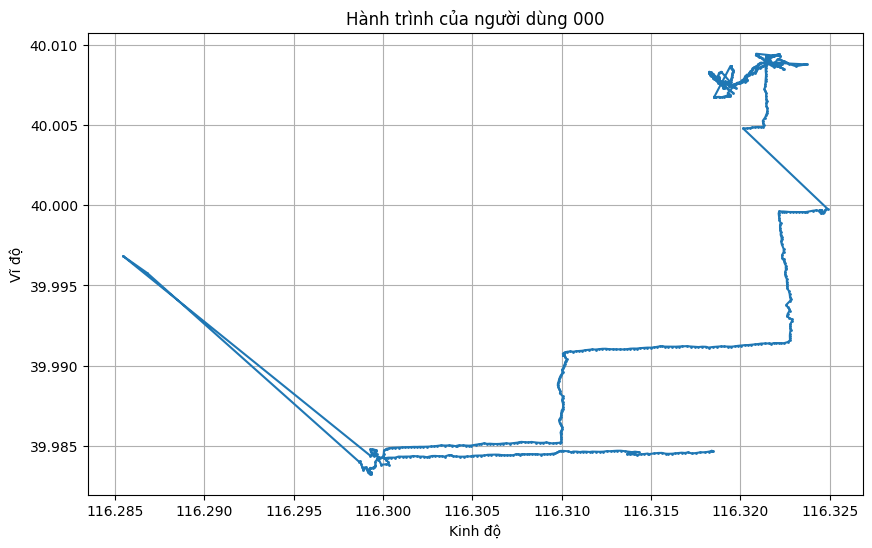

In [6]:
# Vẽ hành trình
plt.figure(figsize=(10, 6))
plt.plot(df['longitude'], df['latitude'], marker='o', markersize=1, linestyle='-')
plt.title(f'Hành trình của người dùng {user_id}')
plt.xlabel('Kinh độ')
plt.ylabel('Vĩ độ')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

# Load dữ liệu
df = pd.read_csv("gop_data.csv", parse_dates=['timestamp_days'])

# Chuyển về chỉ số thời gian (epoch)
df['time'] = df['timestamp_days'].astype(np.int64) // 10**9
df = df.sort_values('time')

# Tính khoảng cách di chuyển mỗi giờ (hoặc mỗi 30 phút)
df['lat_diff'] = df['lat'].diff()
df['lon_diff'] = df['lon'].diff()
df['dist'] = np.sqrt(df['lat_diff']**2 + df['lon_diff']**2)

# Lấy chuỗi di chuyển theo thời gian đều (resample)
df_resample = df.set_index('timestamp_days').resample('1H').sum()['dist'].fillna(0)

# FFT
N = len(df_resample)
T = 1.0  # 1 giờ
yf = fft(df_resample)
xf = fftfreq(N, T)[:N//2]

# Biểu diễn phổ
plt.figure()
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.title("Phổ tần suất di chuyển")
plt.xlabel("Tần số (1/giờ)")
plt.ylabel("Biên độ")
plt.grid()
plt.show()


ValueError: Missing column provided to 'parse_dates': 'timestamp'